In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
url="https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"
df = pd.read_csv(url)

#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#Basic Statistics That describes the Data set

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [7]:
#Information about missing/Null values
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


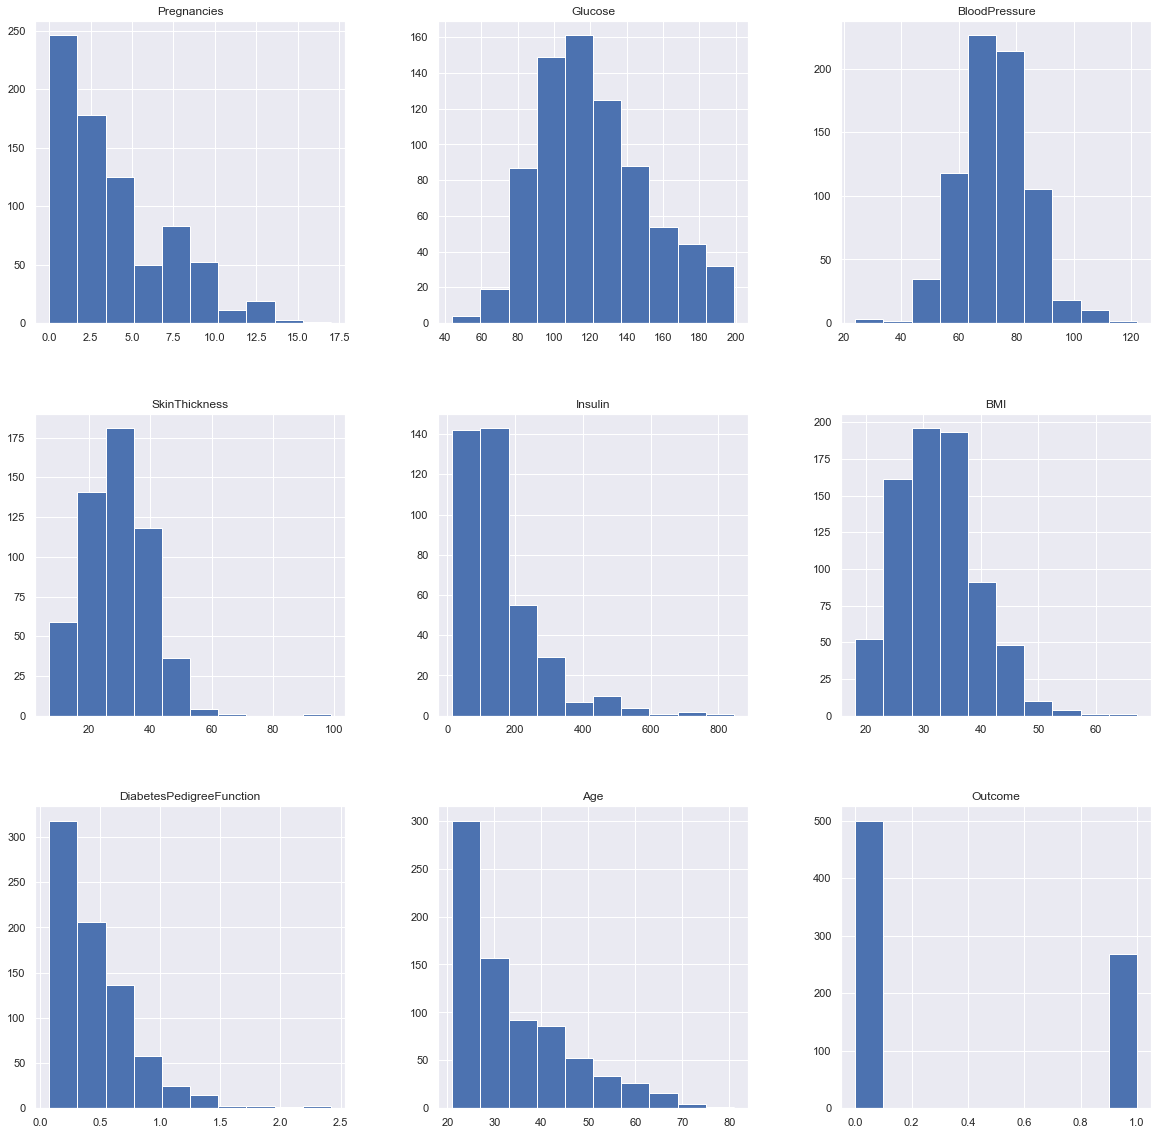

In [8]:
#Lets check the distribution of each attributes in order to handle the missing values
p = df.hist(figsize = (20,20))

In [9]:
df.skew(axis=0,skipna=True)

Pregnancies                 0.901674
Glucose                     0.530989
BloodPressure               0.134153
SkinThickness               0.690619
Insulin                     2.166464
BMI                         0.593970
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

# Handling the Missing Values

In [10]:
df['Glucose'].fillna(df['Glucose'].mean(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(),inplace=True)
df['BMI'].fillna(df['BMI'].mean(),inplace=True)

In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
# The attributes 'Insulin' and 'SkinThickness' contains a significant amount of  null values and 
# also the distribution of these attributes are skewed. SO we try to impute them with the median values in accordance
# with the diabetis outcome

In [13]:
mdn_insulin=df['Insulin'].groupby(df['Outcome']).median()
mdn_skt = df['SkinThickness'].groupby(df['Outcome']).median()

In [14]:
#df[df['Outcome']==0]['Insulin'].fillna(mdn_insulin[0],inplace=True)
#df[df['Outcome']==1]['Insulin'].fillna(mdn_insulin[1],inplace=True)
#df[df['Outcome']==0]['SkinThickness'].fillna(mdn_skt[0],inplace=True)
#df[df['Outcome']==1]['SkinThickness'].fillna(mdn_skt[1],inplace=True)
df['Insulin'].groupby(df['Outcome']).describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,264.0,130.287879,102.482237,15.0,66.0,102.5,161.25,744.0
1,130.0,206.846154,132.699898,14.0,127.5,169.5,239.25,846.0


In [15]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin']=mdn_insulin[0]
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin']=mdn_insulin[1]
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness']=mdn_skt[0]
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness']=mdn_skt[1]

In [16]:
#df.isnull().sum()
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

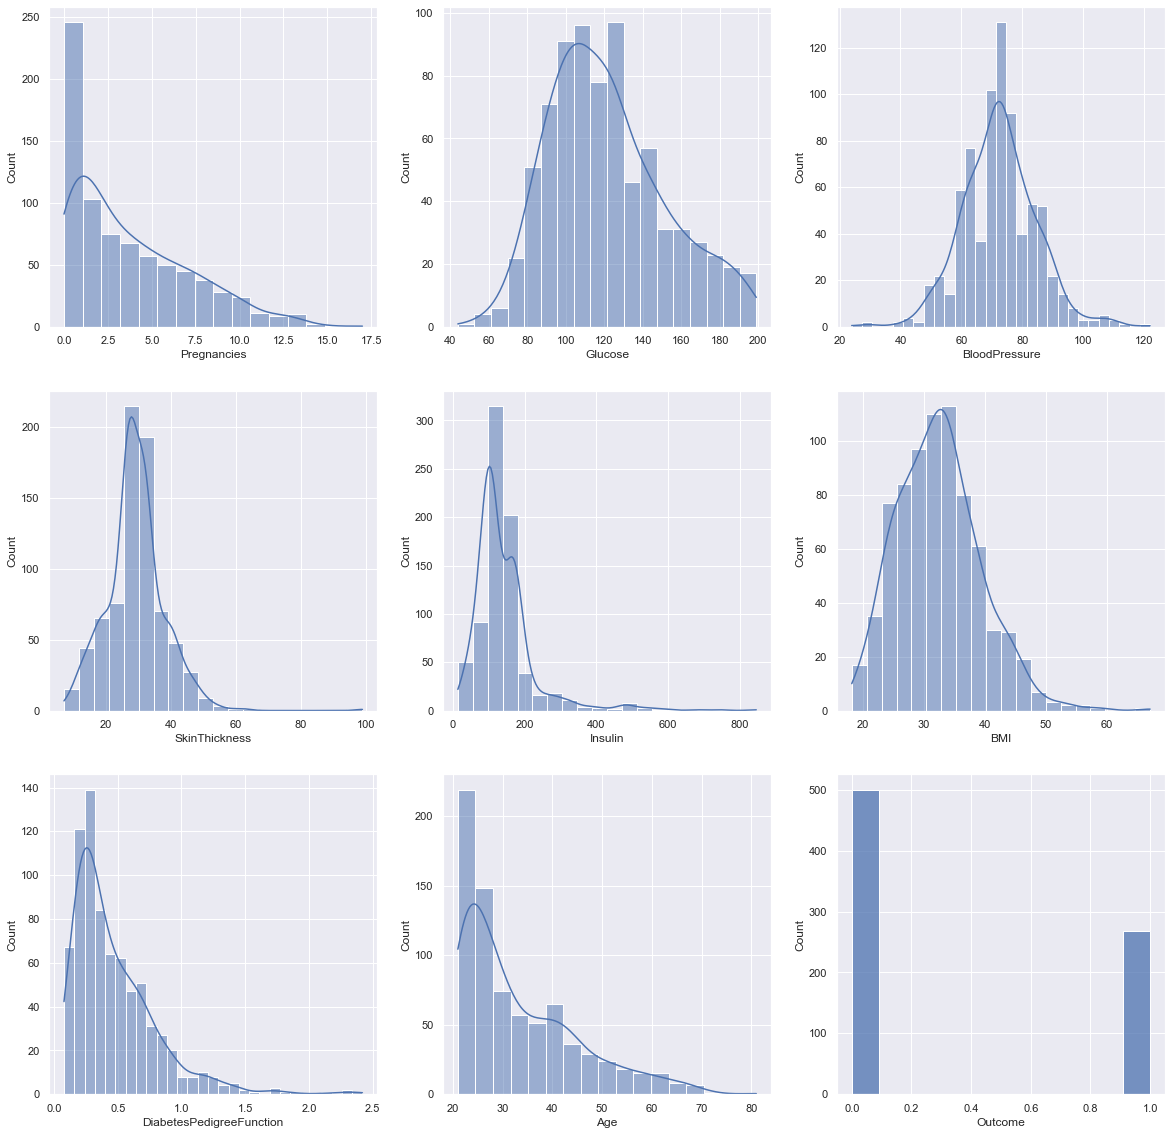

In [17]:

fig,axes=plt.subplots(3,3,figsize=(20,20))
sns.histplot(x=df['Pregnancies'],kde=True,ax=axes[0,0])
sns.histplot(x=df['Glucose'],kde=True,ax=axes[0,1])
sns.histplot(x=df['BloodPressure'],kde=True,ax=axes[0,2])
sns.histplot(x=df['SkinThickness'],bins=20,kde=True,ax=axes[1,0])
sns.histplot(x=df['Insulin'],bins=20,kde=True,ax=axes[1,1])
sns.histplot(x=df['BMI'],bins=20,kde=True,ax=axes[1,2])
sns.histplot(x=df['DiabetesPedigreeFunction'],kde=True,ax=axes[2,0])
sns.histplot(x=df['Age'],kde=True,ax=axes[2,1])
sns.histplot(x=df['Outcome'],ax=axes[2,2])
plt.show()

In [18]:
# Box Plots and Outlier Analysis

In [19]:
# fig,axes=plt.subplots(3,3,figsize=(20,20))
# ax=sns.boxplot(x=df['Pregnancies'],ax=axes[0,0],orient='v')
# ax=sns.boxplot(x=df['Glucose'],ax=axes[0,1],orient='v')
# ax=sns.boxplot(x=df['BloodPressure'],ax=axes[0,2],orient='v')
# ax=sns.boxplot(x=df['SkinThickness'],ax=axes[1,0],orient='v')
# ax=sns.boxplot(x=df['Insulin'],ax=axes[1,1],orient='v')
# ax=sns.boxplot(x=df['BMI'],ax=axes[1,2],orient='v')
# ax=sns.boxplot(x=df['DiabetesPedigreeFunction'],ax=axes[2,0],orient='v')
# ax=sns.boxplot(x=df['Age'],ax=axes[2,1],orient='v')
# ax=sns.boxplot(x=df['Outcome'],ax=axes[2,2],orient='v')

# plt.show()#

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

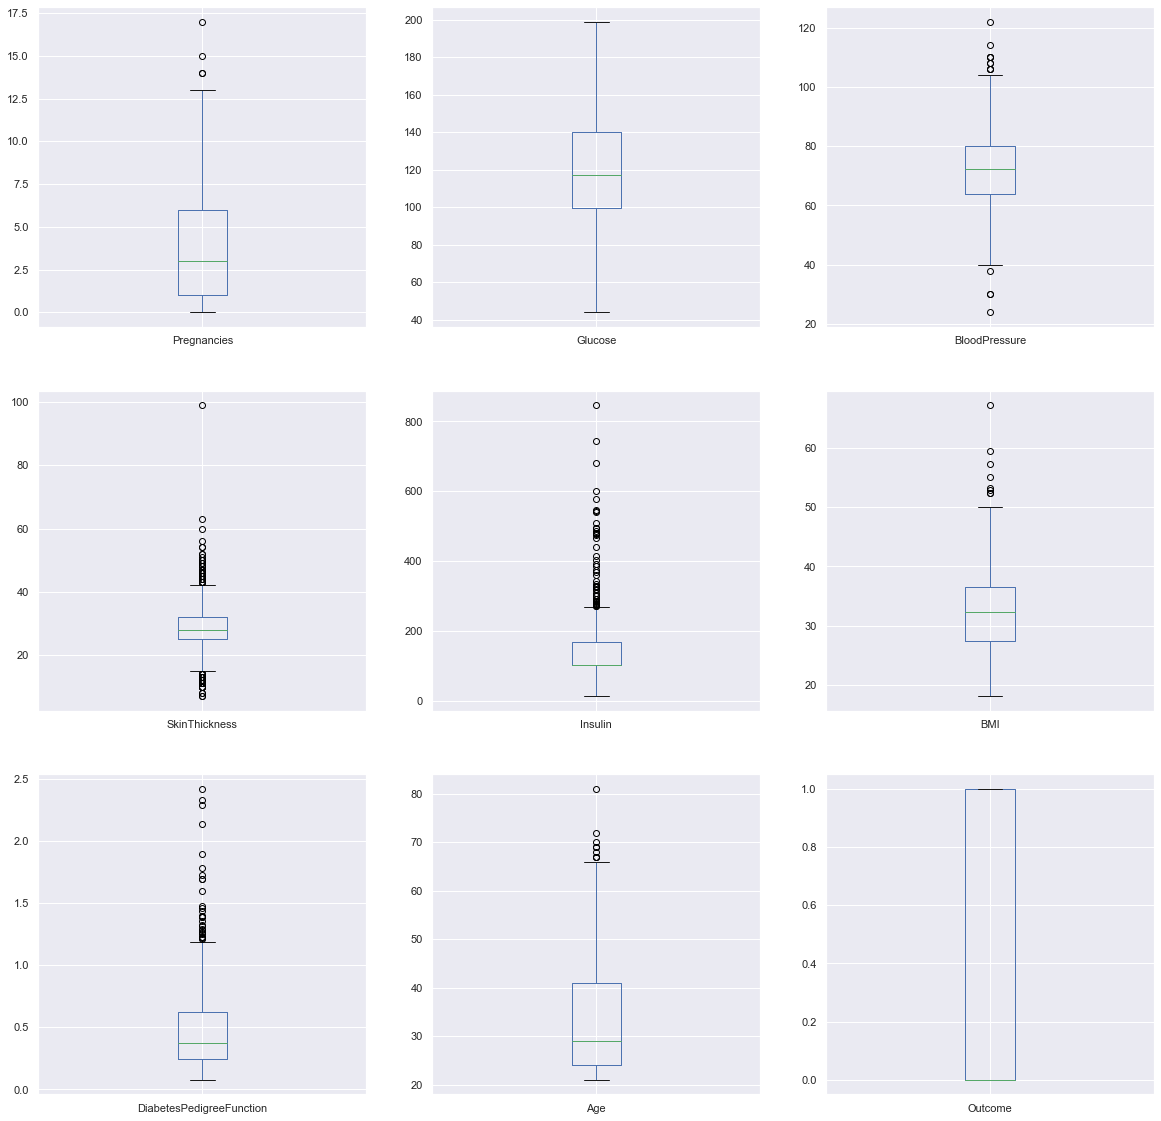

In [20]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,20))

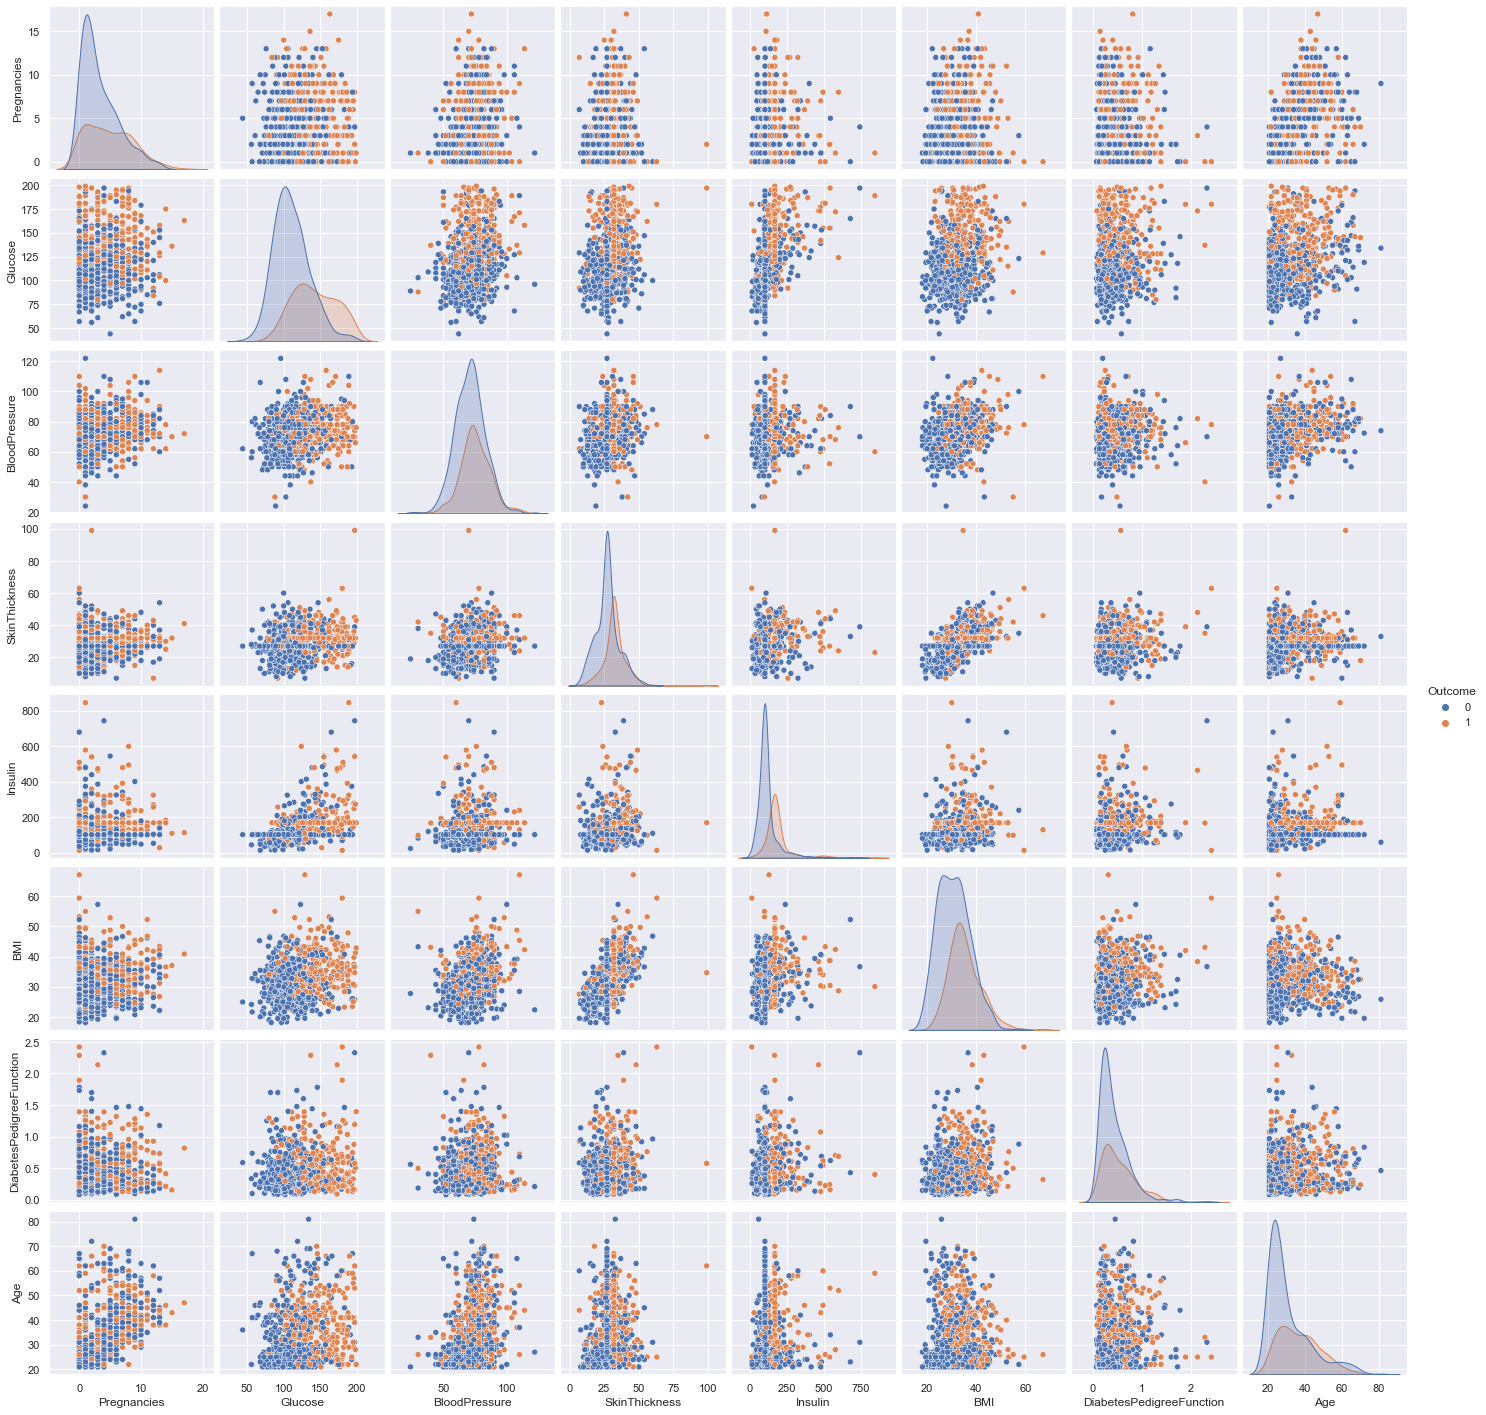

In [21]:
p=sns.pairplot(df, hue = 'Outcome')

### Box Plot analysis of Each attribute with respect to Outcome

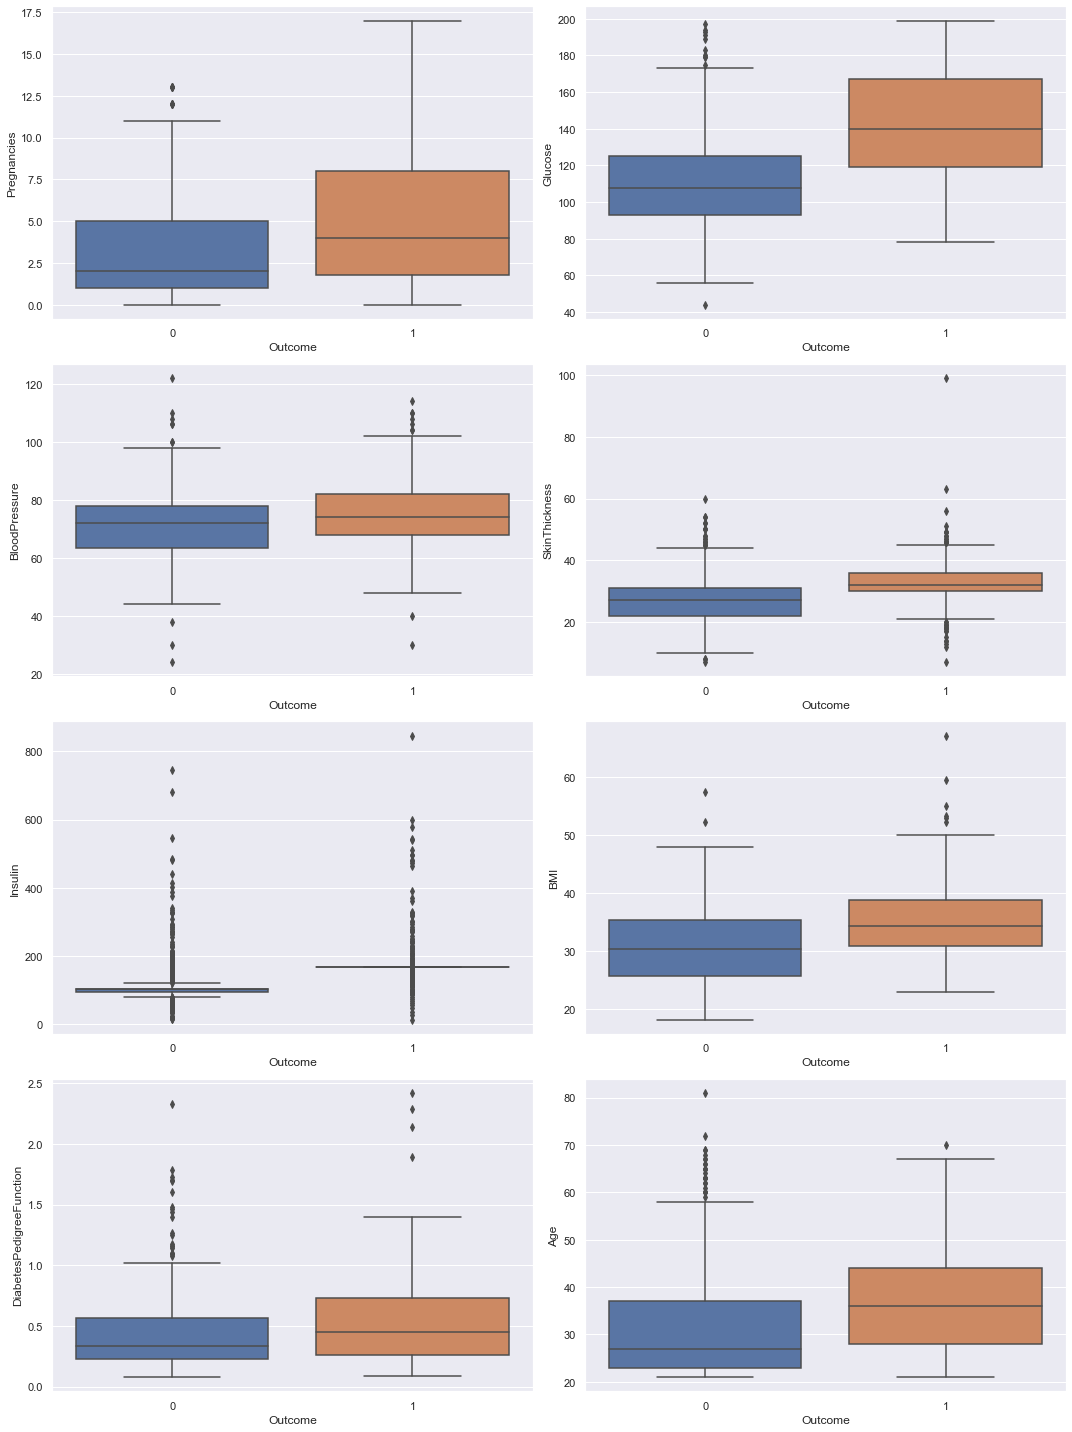

In [22]:
fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (15,20))
for column, subplot in zip(df, ax.flatten()):
    if column == 'Outcome':
        continue
    sns.boxplot(x = df.Outcome, y = df[column], ax = subplot)
    
fig.tight_layout()
plt.show()

In [23]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.170000,117.172000,30.888434,0.429734,31.190000
1,4.865672,142.165573,75.147324,32.671642,187.615672,35.384757,0.550500,37.067164


<AxesSubplot:>

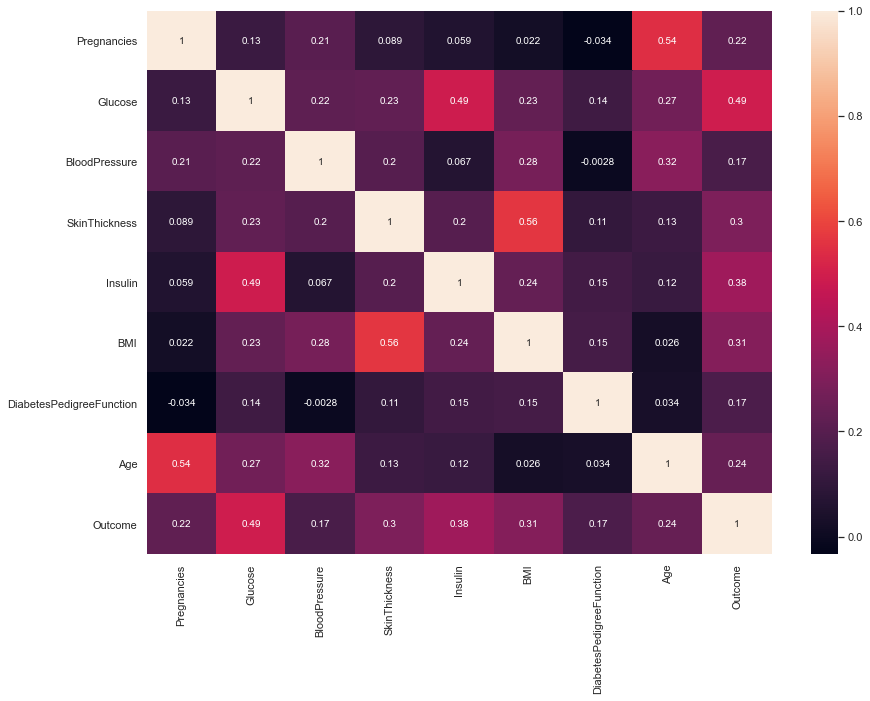

In [24]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)

# Scaling Data 

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [26]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.665181,0.311604,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.010112,-0.440843,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,0.327535,0.311604,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.685405,-0.536303,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.665181,0.294758,1.548980,5.484909,-0.020496


In [27]:
y = df.Outcome

### Visualising the distributions of the scaled data

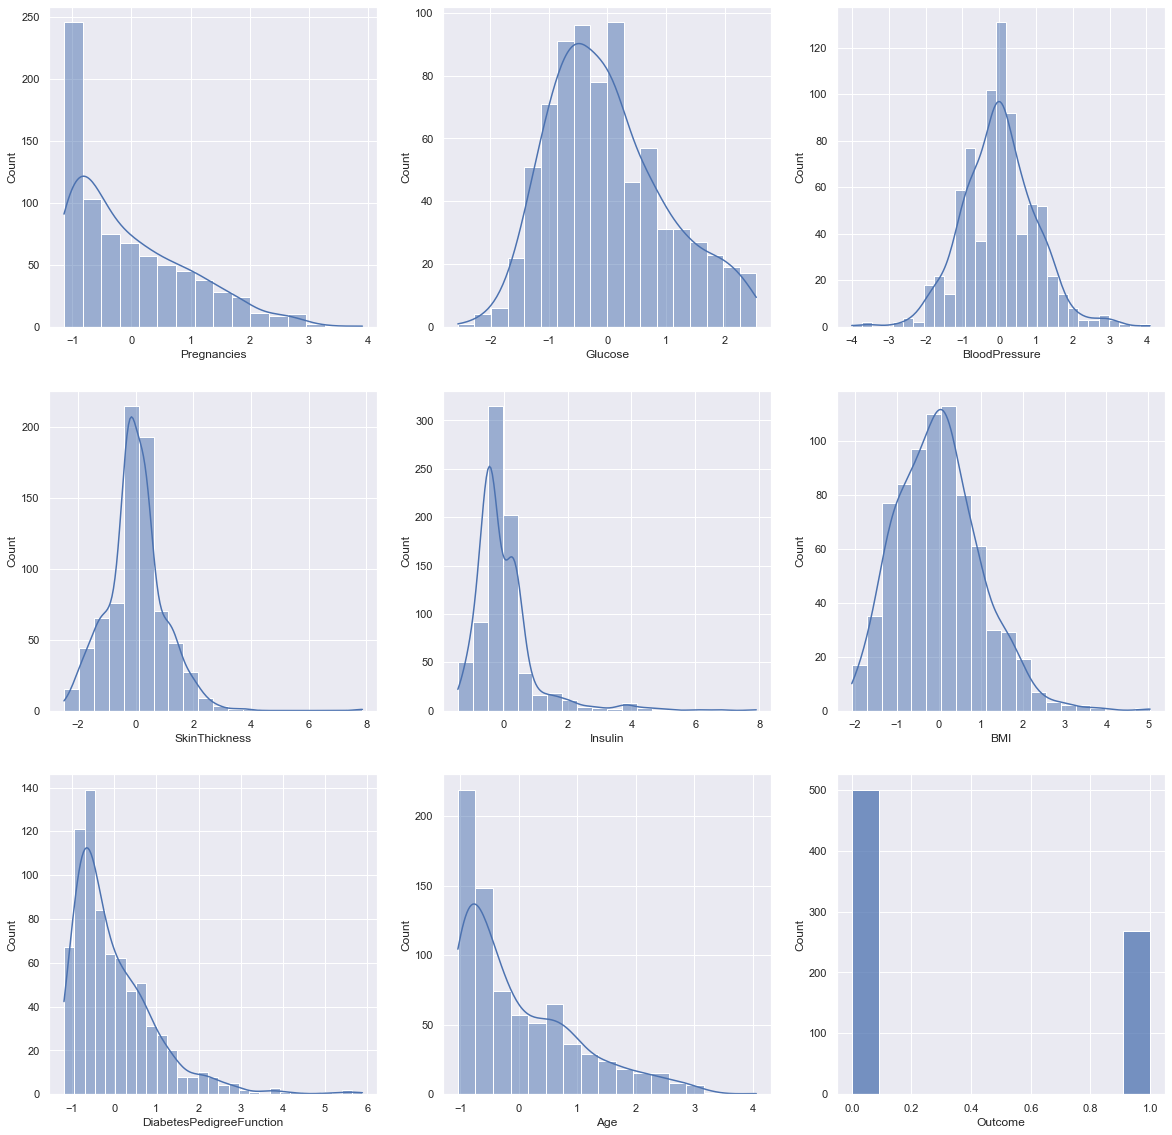

In [28]:

fig,axes=plt.subplots(3,3,figsize=(20,20))
sns.histplot(x=X['Pregnancies'],kde=True,ax=axes[0,0])
sns.histplot(x=X['Glucose'],kde=True,ax=axes[0,1])
sns.histplot(x=X['BloodPressure'],kde=True,ax=axes[0,2])
sns.histplot(x=X['SkinThickness'],bins=20,kde=True,ax=axes[1,0])
sns.histplot(x=X['Insulin'],bins=20,kde=True,ax=axes[1,1])
sns.histplot(x=X['BMI'],bins=20,kde=True,ax=axes[1,2])
sns.histplot(x=X['DiabetesPedigreeFunction'],kde=True,ax=axes[2,0])
sns.histplot(x=X['Age'],kde=True,ax=axes[2,1])
sns.histplot(x=y,ax=axes[2,2])
plt.show()

#### Log transform of - Insulin, Skinthickness, Diabetes Pedigree function
This is Just to check whethere the Log transformation helps to transform the skewed attributes so that we can use it in out model building.But unfortunately it did not help in case of "Insulin", and did not create much difference in case of other two attributes. So let us Stick on to the Z-normalization

<AxesSubplot:ylabel='Count'>

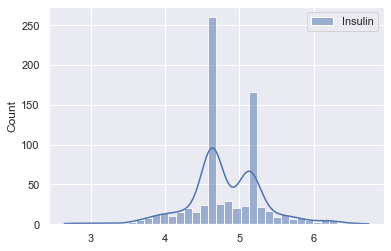

In [29]:
log_ins = pd.DataFrame(np.log(df.Insulin))
sns.histplot(log_ins,kde=True)

# Model 1 - k-nearest neighbours (KNN)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [31]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,21):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

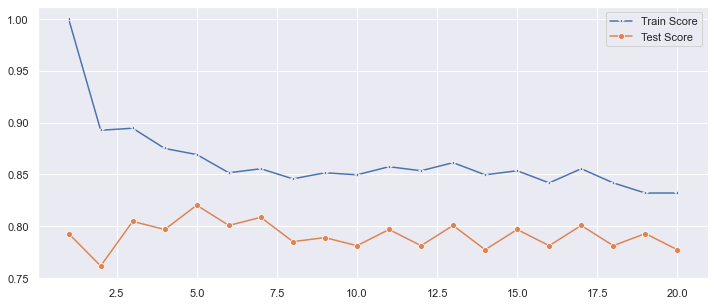

In [32]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,21),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,21),test_scores,marker='o',label='Test Score')

In [33]:
# From the above plot we can take optimum number of neighbours to be considered is 15

In [34]:
knn = KNeighborsClassifier(15)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.796875

#### 10 Fold Cross Validation

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score (knn, X_train, y_train, cv =10, scoring = 'accuracy')
scores

array([0.78846154, 0.78846154, 0.78431373, 0.80392157, 0.84313725,
       0.80392157, 0.76470588, 0.88235294, 0.80392157, 0.8627451 ])

In [36]:
# Average Cross Validation Score Obtained
scores.mean()

0.8125942684766214

### Model Prediction/Performance analysis

In [37]:
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
#confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Predicted,0,1,All
True,,,
0,145,22,167
1,30,59,89
All,175,81,256


In [38]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
tn, fp, fn, tp

(145, 22, 30, 59)

Text(0.5, 12.5, 'Predicted label')

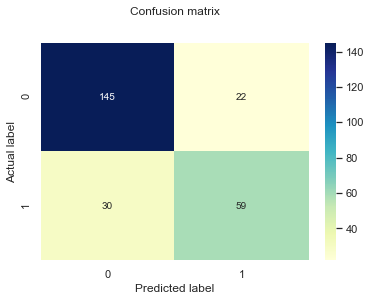

In [39]:
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Classification report

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=['NonDiabetic- 0','Diabetic- 1']))

                precision    recall  f1-score   support

NonDiabetic- 0       0.83      0.87      0.85       167
   Diabetic- 1       0.73      0.66      0.69        89

      accuracy                           0.80       256
     macro avg       0.78      0.77      0.77       256
  weighted avg       0.79      0.80      0.79       256



### ROC Curve and AUC

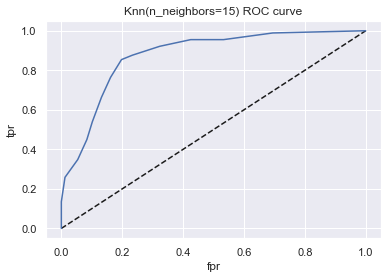

In [41]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1] # returns the probability estimate of +ve class 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=15) ROC curve')
plt.show()

In [42]:
# Area under the curve (AUC) tells about the curve information summarized in one number
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8753952768620062

### Hyper Parameter optimization

In [43]:
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,26)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X_train, y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8300904977375565
Best Parameters: {'n_neighbors': 13}


# Model 2 - Logistic Regression



In [44]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_train, y_train) # Training Set Score

0.802734375

In [45]:
clf.score(X_test,y_test) #Test-Set Score

0.76171875

In [57]:
scores_lr = cross_val_score (clf, X_train, y_train, cv =10, scoring = 'accuracy')
scores_lr

array([0.82692308, 0.80769231, 0.70588235, 0.84313725, 0.82352941,
       0.7254902 , 0.78431373, 0.84313725, 0.78431373, 0.82352941])

In [58]:
scores_lr.mean()

0.7967948717948717

In [46]:
y_pred_lr = clf.predict(X_test)
#confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred_lr, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,140,27,167
1,34,55,89
All,174,82,256


Text(0.5, 12.5, 'Predicted label')

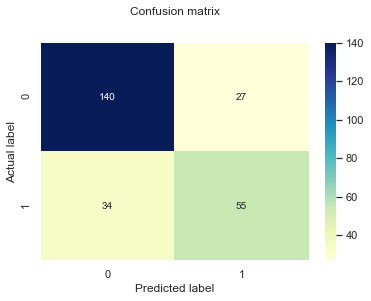

In [59]:
p = sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_lr)), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

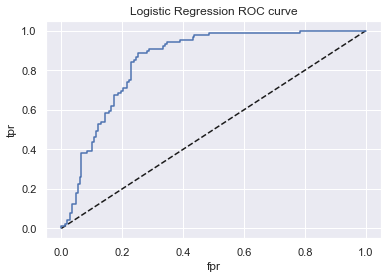

In [56]:
fpr, tpr, thresholds = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='LR')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

#### 10 Fold Crossvalidation and obtaining the mean accuracy score of the classifier

In [47]:
scores_lr = cross_val_score (clf, X_train, y_train, cv =10, scoring = 'accuracy')
scores_lr.mean()

0.7967948717948717

# Model 3 - XGBoost Classifier

In [48]:
pip install Xgboost

In [49]:
from xgboost import XGBClassifier

In [50]:
model=XGBClassifier()
eval_set=[(X_test,y_test)]
model.fit(X_train, y_train,early_stopping_rounds=25,eval_metric="logloss",eval_set=eval_set,verbose=True)

[0]	validation_0-logloss:0.54582
[1]	validation_0-logloss:0.45577
[2]	validation_0-logloss:0.39972
[3]	validation_0-logloss:0.35807
[4]	validation_0-logloss:0.33768
[5]	validation_0-logloss:0.31863
[6]	validation_0-logloss:0.31209
[7]	validation_0-logloss:0.30588
[8]	validation_0-logloss:0.29633
[9]	validation_0-logloss:0.29817
[10]	validation_0-logloss:0.29937
[11]	validation_0-logloss:0.29522
[12]	validation_0-logloss:0.29806
[13]	validation_0-logloss:0.30122
[14]	validation_0-logloss:0.29952
[15]	validation_0-logloss:0.29844
[16]	validation_0-logloss:0.30168
[17]	validation_0-logloss:0.30816
[18]	validation_0-logloss:0.30962
[19]	validation_0-logloss:0.31286
[20]	validation_0-logloss:0.31728
[21]	validation_0-logloss:0.31907
[22]	validation_0-logloss:0.32180
[23]	validation_0-logloss:0.32240
[24]	validation_0-logloss:0.32528
[25]	validation_0-logloss:0.32426
[26]	validation_0-logloss:0.32769
[27]	validation_0-logloss:0.32671
[28]	validation_0-logloss:0.32377
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [51]:
#Model Prediction
from sklearn.metrics import accuracy_score
y_pred_xgb= model.predict(X_test)
accuracy_score(y_pred_xgb,y_test)

0.875

In [52]:
# Confusion Matrix
pd.crosstab(y_test, y_pred_xgb, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,153,14,167
1,18,71,89
All,171,85,256


In [53]:
#Cross validation

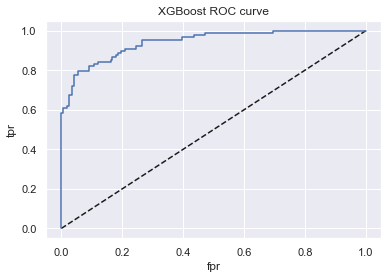

In [60]:
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='XGBoost')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('XGBoost ROC curve')
plt.show()

### Feature Importance using XGBoost

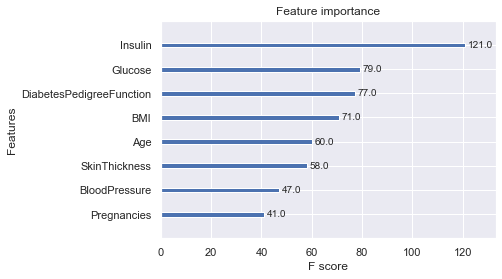

In [54]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

In [55]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.
